<a href="https://colab.research.google.com/github/Satyajit1512/DeepLearningWithPython/blob/main/MushroomCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!rm -rf /root/.cache/kagglehub/datasets

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("maysee/mushrooms-classification-common-genuss-images")

print("Path to dataset files:", path)

100%|██████████| 1.85G/1.85G [01:29<00:00, 22.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/maysee/mushrooms-classification-common-genuss-images/versions/1


In [3]:
import os
os.listdir(path)

['Mushrooms', 'mushrooms']

In [4]:
dir_path = os.path.join(path,"mushrooms/Mushrooms")

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import random


def show_image_from_each_dir(dir_path):
    '''
    Fetch a random image from each directory and display it using matplotlib.
    '''
    for dir in os.listdir(dir_path):

        path_to_subdir = os.path.join(dir_path, dir)
        images_list = os.listdir(path_to_subdir)
        random_choice = random.randint(0,len(images_list)-1)
        print(f"This is a random {dir}")
        image_path = os.path.join(path_to_subdir,images_list[random_choice])
        img = image.load_img(image_path, target_size=(150, 150))  # Resize to 150x150 or any size you want
        img_array = image.img_to_array(img)
        img_array = img_array / 255.0

        # Display the image using matplotlib
        plt.imshow(img_array)
        plt.axis('off')  # Hide axes
        plt.show()

This is a random Russula


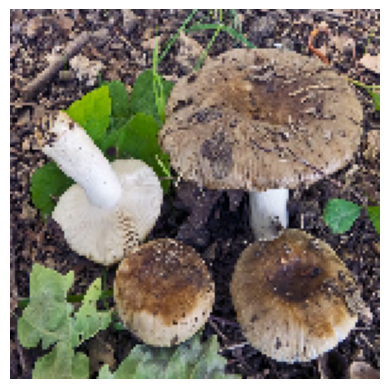

This is a random Boletus


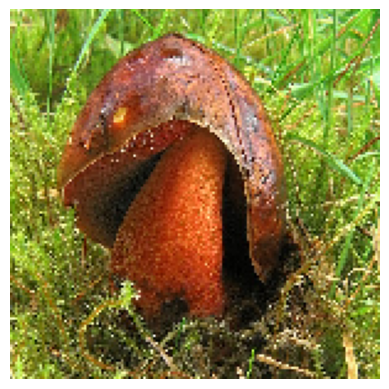

This is a random Cortinarius


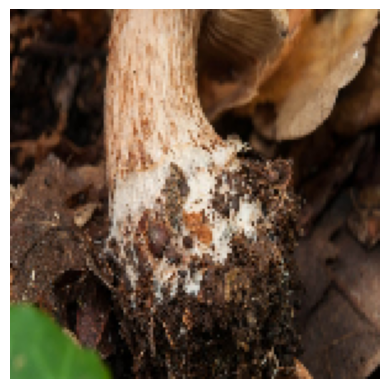

This is a random Entoloma


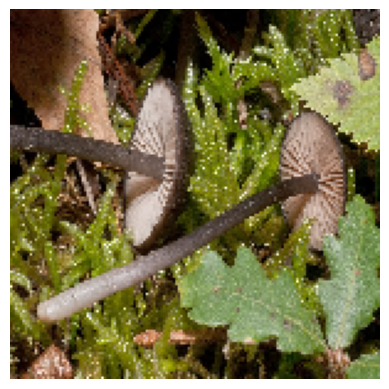

This is a random Hygrocybe


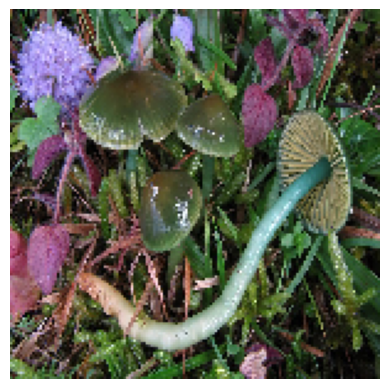

This is a random Lactarius


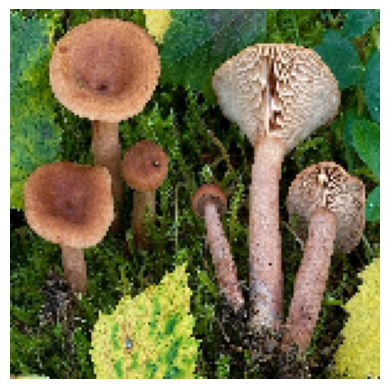

This is a random Agaricus


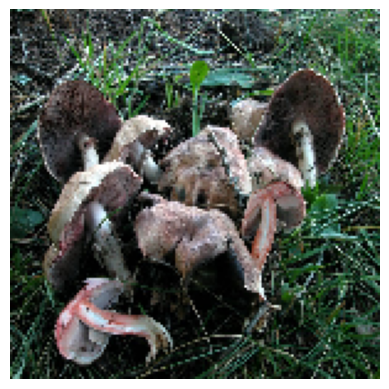

This is a random Amanita


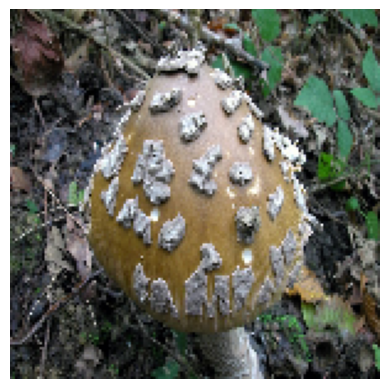

This is a random Suillus


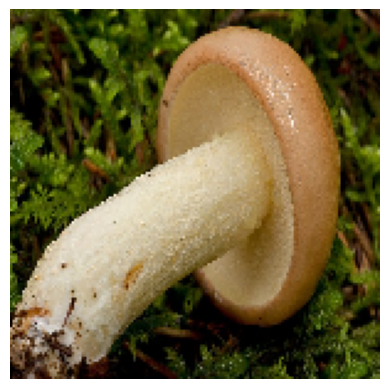

In [6]:
show_image_from_each_dir(dir_path)

In [7]:
import shutil
from tensorflow.keras.utils import img_to_array, load_img

def create_test_train_validation_dirs(root_path, frac_test = 0.2, frac_valid = 0.1):

  '''
  Create train, test and validation directories.
  '''

  class_list = os.listdir(root_path)

  project_dir = os.path.join(root_path, "Project")

  if os.path.isdir(project_dir):
    print(f"The subdirectory '{project_dir}' exists.")
    shutil.rmtree(project_dir)
  else:
    print(f"The subdirectory '{project_dir}' does not exist.")

  os.makedirs(project_dir,exist_ok=True)

  print(os.listdir(root_path))

  test_dir = os.path.join(project_dir,"test")
  train_dir = os.path.join(project_dir,"train")
  validation_dir = os.path.join(project_dir,"validation")

  os.makedirs(test_dir,exist_ok=True)
  os.makedirs(train_dir,exist_ok=True)
  os.makedirs(validation_dir,exist_ok=True)


  for class_name in class_list:

      print(class_name)

      test_dir_class = os.path.join(test_dir,class_name)
      train_dir_class = os.path.join(train_dir,class_name)
      validation_dir_class = os.path.join(validation_dir,class_name)

      os.makedirs(test_dir_class,exist_ok=True)
      os.makedirs(train_dir_class,exist_ok=True)
      os.makedirs(validation_dir_class,exist_ok=True)

      path_to_subdir = os.path.join(dir_path, class_name)
      images_list = os.listdir(path_to_subdir)

      num_images = len(images_list)

      num_test = round(num_images * frac_test)
      num_valid = round(num_images * frac_valid)
      num_train = num_images - num_test - num_valid

      train_images = images_list[num_train:]
      valid_images = images_list[num_train:num_train+num_valid]
      test_images = images_list[num_train+num_valid:]

      for sub_dir, image_list in {test_dir_class:test_images, validation_dir_class: valid_images, train_dir_class:train_images}.items():

          for image in image_list:
              try:
                  img_path = os.path.join(path_to_subdir, image)
                  img = load_img(img_path)  # Try loading the image
                  img = img_to_array(img)   # Convert it to an array
                  destination = os.path.join(sub_dir,image)
                  source = os.path.join(path_to_subdir,image)
                  shutil.copy(source, destination)

              except (OSError, ValueError) as e:
                  print(f"Error loading image {img_path}: {e}")

  return train_dir,validation_dir,test_dir

In [8]:
train_dir,validation_dir,test_dir = create_test_train_validation_dirs(dir_path)

The subdirectory '/root/.cache/kagglehub/datasets/maysee/mushrooms-classification-common-genuss-images/versions/1/mushrooms/Mushrooms/Project' does not exist.
['Russula', 'Boletus', 'Cortinarius', 'Entoloma', 'Project', 'Hygrocybe', 'Lactarius', 'Agaricus', 'Amanita', 'Suillus']
Russula
Boletus
Cortinarius
Entoloma
Hygrocybe
Lactarius
Agaricus
Amanita
Suillus


In [9]:
os.listdir(test_dir)

['Russula',
 'Boletus',
 'Cortinarius',
 'Entoloma',
 'Hygrocybe',
 'Lactarius',
 'Agaricus',
 'Amanita',
 'Suillus']

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize ImageDataGenerator for training and validation sets
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Load the images from the directories using flow_from_directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 2015 images belonging to 9 classes.
Found 1344 images belonging to 9 classes.
Found 671 images belonging to 9 classes.


In [11]:
os.listdir(dir_path)

['Russula',
 'Boletus',
 'Cortinarius',
 'Entoloma',
 'Project',
 'Hygrocybe',
 'Lactarius',
 'Agaricus',
 'Amanita',
 'Suillus']

In [12]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(9, activation='softmax')])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
 63/100 ━━━━━━━━━━━━━━━━━━━━ 7s 193ms/step - accuracy: 0.2126 - loss: 2.4586

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 177ms/step - accuracy: 0.2135 - loss: 2.3553 - val_accuracy: 0.2340 - val_loss: 2.0252
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 125ms/step - accuracy: 0.2481 - loss: 1.9935 - val_accuracy: 0.3159 - val_loss: 1.9209
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 123ms/step - accuracy: 0.3469 - loss: 1.8367 - val_accuracy: 0.4054 - val_loss: 1.6574
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 122ms/step - accuracy: 0.4117 - loss: 1.6300 - val_accuracy: 0.4948 - val_loss: 1.3890
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 122ms/step - accuracy: 0.5232 - loss: 1.3313 - val_accuracy: 0.6736 - val_loss: 1.0147
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 124ms/step - accuracy: 0.6627 - loss: 0.9524 - val_accuracy: 0.8092 - val_loss: 0.5763
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 122ms/step - accuracy: 0.8146 - loss: 0.5427 - val_accuracy: 0.9374 - val_loss: 0.2276
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 123ms/step - accuracy: 0.9427 - loss: 0.1982 - val

In [14]:
test_loss, test_accuracy = model.evaluate(test_generator)

# Print the test accuracy
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - accuracy: 0.9996 - loss: 0.0019
Test accuracy: 99.93%
